**Experiment#2: GB Classification using Kaggle Processed data**


In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
import pandas as pd
df= pd.read_csv('/content/gdrive/MyDrive/data/heart_failure_Fsd.csv')


In [ ]:

#Import required libraries
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

from matplotlib.collections import PathCollection
from statsmodels.graphics.gofplots import qqplot
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report, accuracy_score
from xgboost import XGBClassifier
from yellowbrick.classifier import PrecisionRecallCurve, ROCAUC, ConfusionMatrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, matthews_corrcoef
from yellowbrick.style import set_palette
from yellowbrick.model_selection import LearningCurve, FeatureImportances
from yellowbrick.contrib.wrapper import wrap

# --- Libraries Settings ---

sns.set_style('whitegrid')
plt.rcParams['figure.dpi']=100

In [ ]:
df1 = df.copy()

In [ ]:
new_columns = ['TIME','T','SEX','SMOK','DBT','HBP','ANM','AGE','EF','SS','CPK','PLTS','CPK']

df1.columns = new_columns
df1.head()

,TIME,T,SEX,SMOK,DBT,HBP,ANM,AGE,EF,SS,CPK,PLTS,CPK
0,97,0,0,0,0,0,1,43.0,50,135,1.30,237000.00,358
1,180,0,1,1,1,0,1,73.0,30,142,1.18,160000.00,231
2,31,1,1,1,0,1,0,70.0,20,134,1.83,263358.03,582
3,87,0,1,0,0,0,1,65.0,25,141,1.10,298000.00,305
4,113,0,1,0,0,0,0,64.0,60,137,1.00,242000.00,1610


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Age      303 non-null    int64  
 1   Sex      303 non-null    int64  
 2   CP       303 non-null    int64  
 3   ResBP    303 non-null    int64  
 4   SC       303 non-null    int64  
 5   FastBS   303 non-null    int64  
 6   RestECG  303 non-null    int64  
 7   MaxHR    303 non-null    int64  
 8   ExeIA    303 non-null    int64  
 9   OldPST   303 non-null    float64
 10  SlopePE  303 non-null    int64  
 11  MajorVC  303 non-null    int64  
 12  TS       303 non-null    int64  
 13  L        303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df1.describe()

,TIME,T,SEX,SMOK,DBT,HBP,ANM,AGE,EF,SS,CPK,PLTS,CPK
count,299.000000,299.00000,299.000000,299.00000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000
mean,130.260870,0.32107,0.648829,0.32107,0.418060,0.351171,0.431438,60.833893,38.083612,136.625418,1.39388,263358.029264,581.839465
std,77.614208,0.46767,0.478136,0.46767,0.494067,0.478136,0.496107,11.894809,11.834841,4.412477,1.03451,97804.236869,970.287881
min,4.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,40.000000,14.000000,113.000000,0.50000,25100.000000,23.000000
25%,73.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,51.000000,30.000000,134.000000,0.90000,212500.000000,116.500000
50%,115.000000,0.00000,1.000000,0.00000,0.000000,0.000000,0.000000,60.000000,38.000000,137.000000,1.10000,262000.000000,250.000000
75%,203.000000,1.00000,1.000000,1.00000,1.000000,1.000000,1.000000,70.000000,45.000000,140.000000,1.40000,303500.000000,582.000000
max,285.000000,1.00000,1.000000,1.00000,1.000000,1.000000,1.000000,95.000000,80.000000,148.000000,9.40000,850000.000000,7861.000000


In [ ]:
# separating the dependent features
x = df1.drop(['T'], axis = 1)
y = df1['T']

In [ ]:
from sklearn.preprocessing import MinMaxScaler
x = MinMaxScaler().fit_transform(x)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

**Gradient Boost with default parameters**

In [ ]:
# --- Applying Gradient Boosting ---
classifierGB = GradientBoostingClassifier()

classifierGB.fit(x_train, y_train)
GBy_pred = classifierGB.predict(x_test)
# Calculate accuracy
acGB = accuracy_score(y_test, GBy_pred)
precisionGB = precision_score(y_test, GBy_pred)
recallGB = recall_score(y_test, GBy_pred)
f1GB = f1_score(y_test, GBy_pred)
auc_rocGB = roc_auc_score(y_test, GBy_pred)

print("Accuracy of GB:", acGB)
print("Precision of GB:", precisionGB)
print("Recall of GB:", recallGB)
print("F1-score of GB:", f1GB)
print("AUC-ROC of GB:", auc_rocGB)

# Calculate MCC
mccGB = matthews_corrcoef(y_test, GBy_pred)
print("MCC of GB:", mccGB)

# Calculate prediction time
import time
start_time = time.time()

p_timeGB = time.time() - start_time
print("Prediction Time:", p_timeGB)

Accuracy of GB: 0.8833333333333333
Precision of GB: 0.8235294117647058
Recall of GB: 0.7777777777777778
F1-score of GB: 0.7999999999999999
AUC-ROC of GB: 0.8531746031746031
MCC of GB: 0.718326140056885
Prediction Time: 7.43865966796875e-05


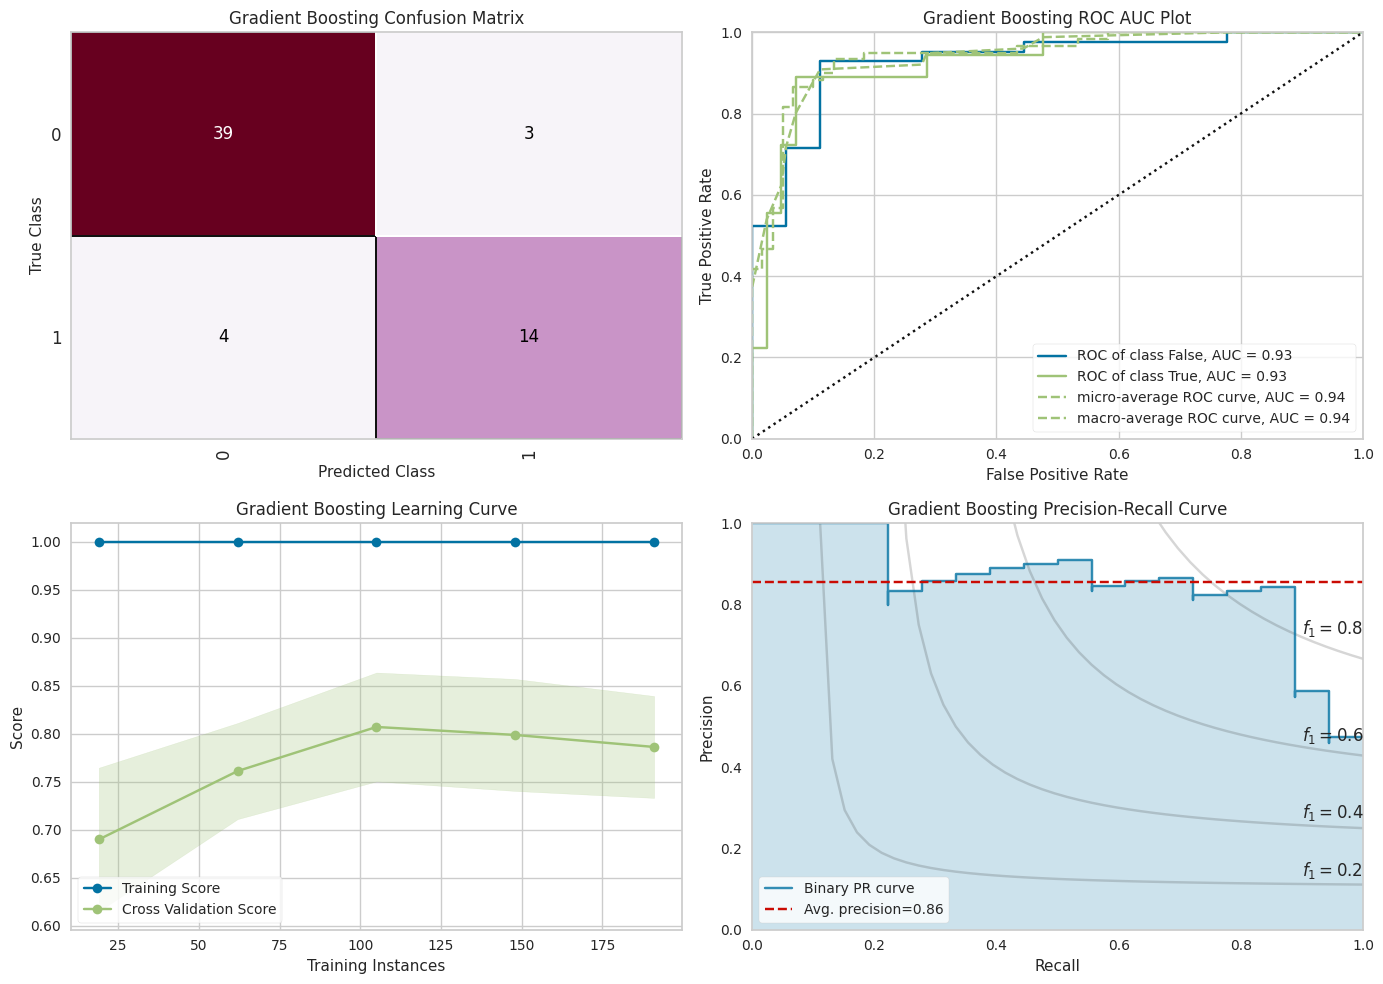

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 10))

# --- Gradient Boosting Confusion Matrix ---
gbcmatrix = ConfusionMatrix(classifierGB, ax=ax1, cmap='PuRd',
                            title='Gradient Boosting Confusion Matrix')
gbcmatrix.fit(x_train, y_train)
gbcmatrix.score(x_test, y_test)
gbcmatrix.finalize()

# --- Gradient Boosting ROC AUC ---
gbcrocauc = ROCAUC(classifierGB, classes=['False', 'True'], ax=ax2,
                   title='Gradient Boosting ROC AUC Plot')
gbcrocauc.fit(x_train, y_train)
gbcrocauc.score(x_test, y_test)
gbcrocauc.finalize()

# --- Gradient Boosting Learning Curve ---
gbclc = LearningCurve(classifierGB, ax=ax3, title='Gradient Boosting Learning Curve')
gbclc.fit(x_train, y_train)
gbclc.finalize()

# --- Gradient Boosting Precision Recall Curve ---
gbcurve = PrecisionRecallCurve(classifierGB, ax=ax4, ap_score=True, iso_f1_curves=True,
                                title='Gradient Boosting Precision-Recall Curve')
gbcurve.fit(x_train, y_train)
gbcurve.score(x_test, y_test)
gbcurve.finalize()

plt.tight_layout();